In [1]:
!pip install pandas numpy seaborn matplotlib

In [2]:
# 1. 라이브러리 임포트 및 데이터 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() 


plt.rcParams['font.family'] = font_name

plt.rcParams['axes.unicode_minus'] = False


df = sns.load_dataset('titanic') 

# 실습에 필요한 컬럼만 추출하고 이름 통일
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']]

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [9]:
# 2. 중복 처리 (Duplicates Handling)

# 2-1. 중복된 행 확인
duplicate_count = df.duplicated().sum()
print(f"전체 중복 행 개수: {duplicate_count}개")

df_cleaned = df.drop_duplicates(keep='first')
print(f"중복 제거 후 데이터셋 크기: {df_cleaned.shape}")


df_cleaned.info()

전체 중복 행 개수: 107개
중복 제거 후 데이터셋 크기: (784, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  784 non-null    int64   
 1   pclass    784 non-null    int64   
 2   sex       784 non-null    object  
 3   age       678 non-null    float64 
 4   sibsp     784 non-null    int64   
 5   parch     784 non-null    int64   
 6   fare      784 non-null    float64 
 7   embarked  782 non-null    object  
 8   deck      202 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.2+ KB


In [5]:
# 3. 결측치 처리 (Missing Values Handling)

# 3-1. 결측치 현황 확인
print("\n=== 3-1. 결측치 현황 ===")
print(df_cleaned.isnull().sum())

# 3-2. 'Age' (나이) 결측치 처리: 중앙값(Median) 대체
age_median = df_cleaned['age'].median()
df_cleaned['age'].fillna(age_median, inplace=True)
print(f"\n'age' 결측치 대체 완료 (중앙값: {age_median:.2f})")

# 3-3. 'Embarked' (탑승 항구) 결측치 처리: 최빈값(Mode) 대체
embarked_mode = df_cleaned['embarked'].mode()[0]
df_cleaned['embarked'].fillna(embarked_mode, inplace=True)
print(f"'embarked' 결측치 대체 완료 (최빈값: {embarked_mode})")

# 3-4. 'Cabin' (객실) 결측치 처리: 'M' (Missing)으로 대체
df_cleaned['deck'] = df_cleaned['deck'].astype('object')
df_cleaned['deck'].fillna('M', inplace=True)
print("'deck' 결측치 대체 완료 ('M'으로 대체)")

print("-" * 50)
print("최종 결측치 처리 후 현황:")
print(df_cleaned.isnull().sum())


=== 3-1. 결측치 현황 ===
survived      0
pclass        0
sex           0
age         106
sibsp         0
parch         0
fare          0
embarked      2
deck        582
dtype: int64

'age' 결측치 대체 완료 (중앙값: 28.25)
'embarked' 결측치 대체 완료 (최빈값: S)
'deck' 결측치 대체 완료 ('M'으로 대체)
--------------------------------------------------
최종 결측치 처리 후 현황:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
deck        0
dtype: int64


C:\Users\22138153\AppData\Local\Temp\ipykernel_35048\397916047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'].fillna(age_median, inplace=True)
C:\Users\22138153\AppData\Local\Temp\ipykernel_35048\397916047.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['embarked'].fillna(embarked_mode, inplace=True)
C:\Users\22138153\AppData\Local\Temp\ipykernel_35048\397916047.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

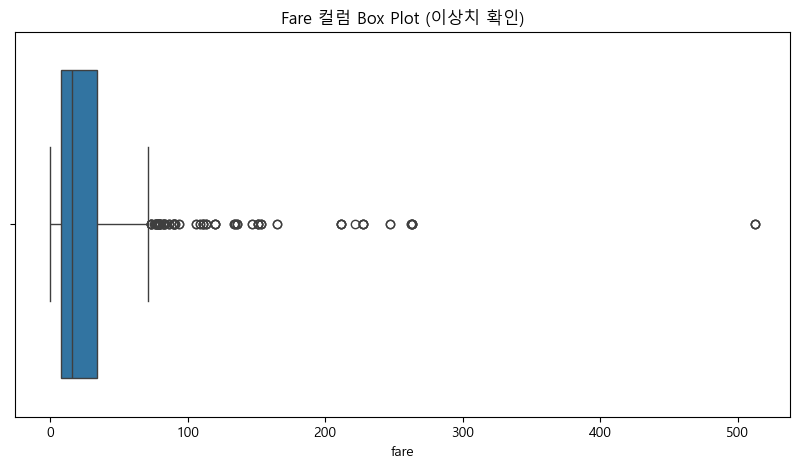

IQR 기반 상한 경계 (Upper Bound): 73.20
'Fare' 컬럼의 상한 이상치 개수: 102개


C:\Users\22138153\AppData\Local\Temp\ipykernel_35048\594866707.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['fare'] = np.where(df_cleaned['fare'] > upper_bound, upper_bound, df_cleaned['fare'])


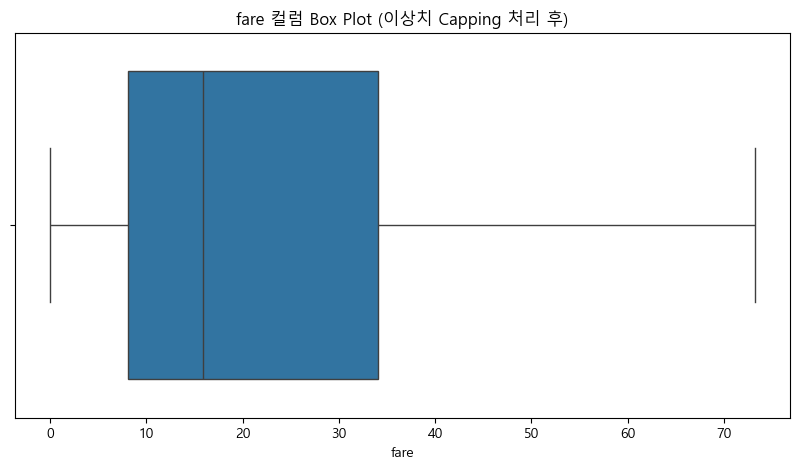

In [6]:
# 4. 이상치 처리 (Outliers Handling)

# 'Fare' (요금) 컬럼의 이상치 처리 예시: IQR 방식 적용

# 4-1. 'Fare' 데이터 분포 시각화 (이상치 확인)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['fare'])
plt.title('Fare 컬럼 Box Plot (이상치 확인)')
plt.show()

# 4-2. IQR (사분위 범위) 계산
Q1 = df_cleaned['fare'].quantile(0.25)
Q3 = df_cleaned['fare'].quantile(0.75)
IQR = Q3 - Q1

# 4-3. 이상치 경계 설정
# 일반적으로 IQR의 1.5배를 벗어난 값을 이상치로 간주
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR 기반 상한 경계 (Upper Bound): {upper_bound:.2f}")

# 4-4. 이상치 처리 방식: 상한 경계값으로 대체 (Capping)
# 상한 경계를 벗어나는 값들은 모두 상한 경계값(Upper Bound)으로 대체
fare_outliers_count = df_cleaned[df_cleaned['fare'] > upper_bound].shape[0]
print(f"'Fare' 컬럼의 상한 이상치 개수: {fare_outliers_count}개")

# 이상치 대체 (Capping)
df_cleaned['fare'] = np.where(df_cleaned['fare'] > upper_bound, upper_bound, df_cleaned['fare'])

# 4-5. 이상치 처리 후 분포 재확인
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['fare'])
plt.title('fare 컬럼 Box Plot (이상치 Capping 처리 후)')
plt.show()